4 経路をみつける―ネットワークの探索

ネットワークを対象としたアルゴリズムにはさまざまなものがあり、そのすべてを網羅することは到底不可能である。本章では、ごく基本的なアルゴリズムについて紹介する。



4.1 探索・幅優先、深さ優先

例えば鉄道網において目的地までの最短経路を見つけたりするなど、ネットワーク上で経路を探す場面は数多く存在する。大規模なネットワークにおいて人手で経路を見つけることは必ずしも容易ではない。ネットワークのアルゴリズムの中で、経路探索は基本的なものである。

ネットワーク$G=(V,E)$と2頂点$v_{s}$と$v_{t}$が与えられて、$v_{s}$から$v_{t}$への経路を探索することを考える。幅優先探索(breadth first search, BFS)は$v_{s}$に隣接する距離1の頂点を全て探し、次に(それらの頂点に隣接する)距離2の全ての頂点、さらに距離3の全ての頂点という順で探索していく手法である(図6-1)。

以下のプログラムでは、Zachary's karate clubにおける頂点0からの幅優先探索の例を示す。NetworkXの関数bfs_edgesでは引数として対象ネットワーク、探索開始点、探索の深さの上限を与えることができる。深さの上限がnの場合に探索した辺と、n-1の場合に探索した辺の差を求めることで、距離nの頂点につながる辺だけを得ることができる。深さ4以降が空であることから、このネットワークの頂点0からは距離3までで他の全ての頂点に到達できることがわかる。



BFS: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 30), (2, 9), (2, 27), (2, 28), (2, 32), (5, 16), (8, 33), (31, 24), (31, 25), (27, 23), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 29), (33, 26)]
depth 1: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31)]
depth 2: [(1, 30), (2, 28), (2, 9), (5, 16), (8, 33), (2, 32), (31, 24), (31, 25), (2, 27)]
depth 3: [(27, 23), (32, 22), (32, 15), (32, 20), (33, 26), (32, 14), (32, 18), (32, 29)]
depth 4: []
depth 5: []


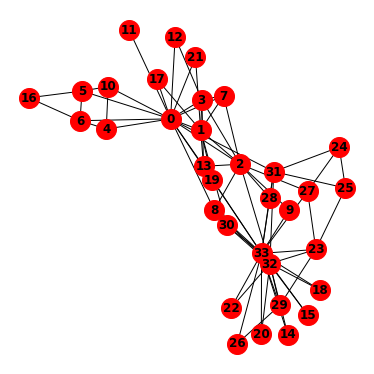

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')
print("BFS:", list(nx.bfs_edges(G, source=0)))

d1 = list(nx.bfs_edges(G, source=0, depth_limit=1))
print("depth 1:", d1)
d2 = list(nx.bfs_edges(G, source=0, depth_limit=2))
print("depth 2:", list(set(d2)-set(d1)))
d3 = list(nx.bfs_edges(G, source=0, depth_limit=3))
print("depth 3:", list(set(d3)-set(d2)))
d4 = list(nx.bfs_edges(G, source=0, depth_limit=4))
print("depth 4:", list(set(d4)-set(d3)))
d5 = list(nx.bfs_edges(G, source=0, depth_limit=5))
print("depth 5:", list(set(d5)-set(d4)))

幅優先探索で、開始頂点からの距離に応じて頂点の色を変えたものが以下の例である。頂点0から距離1のものを濃い青、距離2のものを薄い青、距離3のものを黄色で表示している。

[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 2, 3, 2, 1, 2, 2]


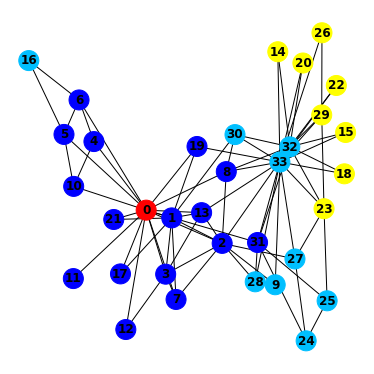

In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

known = [0] * nx.number_of_nodes(G) 
dist = [-1] * nx.number_of_nodes(G)

colors = ['red', 'blue', 'deepskyblue', 'yellow', 'springgreen', 'lightskyblue', 'darkgreen', 'green', 'lightgreen', 'gray', 'lightgray']
color_map = ['black'] * nx.number_of_nodes(G)

start = 0 # start from 0
dist[start] = 0
color_map[start] = colors[dist[start]]
known[start] = 1

d = 0
while sum(known) != nx.number_of_nodes(G) :
  for n in nx.nodes(G) :
    if nx.shortest_path_length(G, start, n) == d :
      for nb in G.neighbors(n) :
        if known[nb] != 1 :
          dist[nb] = d + 1
          color_map[nb] = colors[dist[nb]]
          known[nb] = 1
  d = d + 1

print(dist)

plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color=color_map, with_labels=True, font_weight='bold')

深さ優先探索(depth first search, DFS)は、頂点$v_{s}$に隣接する距離1の頂点をひとつ選び、それに隣接する距離2の頂点の中からまだ訪れていない一つを選び、さらにその隣接する距離3の頂点の中からまだ訪れていない一つを、という順で探索する手法である。

Zachary's karate clubにおける頂点0からの深さ優先探索の例を示す。実行結果は頂点0から深さ優先探索を実施した際に通る辺のリストと、訪れた頂点のリストを示している。頂点0 から0 $\rightarrow$ 1 $\rightarrow$ 2 $\rightarrow$ 3 $\rightarrow$ 7 と探索し、そこでバックトラックしてまた頂点3から3 $\rightarrow$ 12、3 $\rightarrow$ 13...と探索をしていることがわかる。

DFS: [(0, 1), (1, 2), (2, 3), (3, 7), (3, 12), (3, 13), (13, 33), (33, 8), (8, 30), (30, 32), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (23, 25), (25, 24), (24, 27), (24, 31), (31, 28), (23, 29), (29, 26), (33, 9), (33, 19), (1, 17), (1, 21), (0, 4), (4, 6), (6, 5), (5, 10), (5, 16), (0, 11)]
traversed nodes: [0, 1, 2, 3, 7, 12, 13, 33, 8, 30, 32, 14, 15, 18, 20, 22, 23, 25, 24, 27, 31, 28, 29, 26, 9, 19, 17, 21, 4, 6, 5, 10, 16, 11]


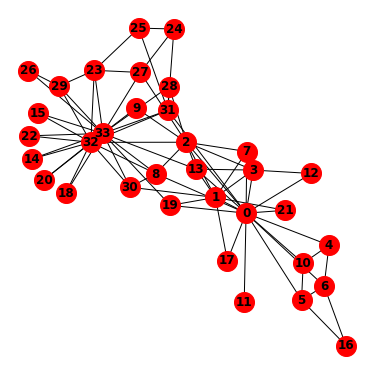

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
plt.figure(figsize=(5, 5))
nx.draw_spring(G, node_size=400, node_color="red", with_labels=True, font_weight='bold')

print("DFS:", list(nx.dfs_edges(G, source=0)))
print("traversed nodes:", list(nx.dfs_preorder_nodes(G, source=0)))

幅優先探索では距離が短いものから順に探索するため、最初に見つかった経路が最短であるが、一般に実行時に多くのメモリを必要とする。一方、深さ優先探索では少ないメモリで実行できるが、距離が短い経路が他にあるのに距離の長い経路を探索してしまう可能性がある。

4.2 ダイクストラのアルゴリズム

幅優先探索・深さ優先探索では全ての辺の距離を同じとしていたが、例えば有料道路などが含まれた道路網においては、それぞれの辺のコストが同じではなく、多くの辺をたどってもコストが小さくなる場合がある(図5-2)。そのような、辺の距離(コスト)が異なる場合の最短経路探索にダイクストラのアルゴリズム(Dijkstra's algorithm)が用いられる。ダイクストラのアルゴリズムはネットワークと開始頂点が与えられたときに、各頂点への最短経路長を求めるものである。

ダイクストラのアルゴリズムの例を以下に示す。ネットワーク中の各辺には距離(コスト)が与えられ、例えば頂点0と頂点1の間の距離(コスト)は7である。与えられたネットワークの頂点数が$n$のとき、各頂点への現時点での最短経路長の見積りを表す長さ$n$の配列と、その見積りの確かさを表す長さ$n$の配列の二つを保持する(図5-3)。初期状態においては最短経路長見積りは全て非常に大きな正数、その確かさは全て0(不確か)とする。実行時には経路長の見積りの配列の中で最短のものを確かな見積りとみなし、その頂点を経由して隣接する頂点に至る経路の距離を計算し、それがこれまでの最短経路長の見積りよりも短ければその見積りを更新するという作業を繰り返す。実行中に配列2つがどのように変化するかが表示され、最終的には開始頂点(頂点0)から各頂点への最短経路見積りが全て確かなものとなって終了する。

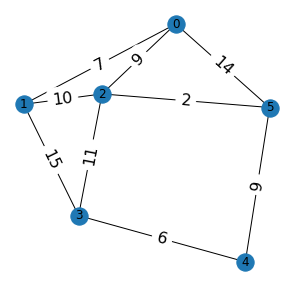

[9223372036854775807, 0, 9223372036854775807, 9223372036854775807, 9223372036854775807, 9223372036854775807]
[0, 0, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 9223372036854775807]
[0, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 21]
[1, 1, 0, 0, 0, 0]
[7, 0, 10, 15, 9223372036854775807, 12]
[1, 1, 1, 0, 0, 0]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 0, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 0, 1]
[7, 0, 10, 15, 21, 12]
[1, 1, 1, 1, 1, 1]


In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
import functools
import operator

G = nx.Graph()
G.add_nodes_from(range(0, 5))
G.add_weighted_edges_from([(0, 1, 7), (0, 2, 9), (0, 5, 14), (1, 2, 10), (1, 3, 15), (2, 3, 11), (2, 5, 2), (3, 4, 6), (4, 5, 9)])

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edge_labels(G, pos, font_size=16, edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

dist_estimate = [sys.maxsize] * nx.number_of_nodes(G) 
dist_certainty = [0] * nx.number_of_nodes(G)
dist_estimate[1] = 0

while functools.reduce(operator.mul, dist_certainty) == 0 :
  print(dist_estimate)
  print(dist_certainty)
  min_v = sys.maxsize
  for n in nx.nodes(G) :
    if (dist_certainty[n] == 0) and (dist_estimate[n] <= min_v) :
      min_v = dist_estimate[n]
      min_id = n
  dist_certainty[min_id] = 1
  for nb in G.neighbors(min_id) :
    new_estimate = G[min_id][nb]['weight'] + dist_estimate[min_id]
    if new_estimate < dist_estimate[nb] :
      dist_estimate[nb] = new_estimate
      
print(dist_estimate)
print(dist_certainty)

4.3 グループを見つける―分割と抽出

友人関係のネットワークでは、友人グループや派閥ができることが多い。ネットワークからそのようなグループを見つけることができれば、似た友人を推薦したりネットワーク全体の構造を把握したりするのに役立つ。一般にネットワークを分割する場合の数は非常に多いため、大規模なネットワークで全ての可能な分割を調べることは現実的ではない。また、どのような分割を望ましいと考えるかについてもさまざまな基準があり、これまでに非常に多くの研究がなされてきている。

大きなネットワークを分割するアプローチとしては主に以下の二つがある。

* あらかじめ与えられた分割数や分割後のサイズに基づいて分割するアプローチ
* そのような情報が与えられず、ネットワークの密な部分を抽出するアプローチ


前者を「ネットワーク分割」、後者は「コミュニティ抽出」と呼ぶ。それぞれについて以下の6.1節と6.2節で説明する。

4.3.1 ネットワーク分割

あらかじめ与えられた分割数や分割後のサイズに基づいたアプローチをネットワーク分割と呼ぶ。例えば大きなネットワークをいくつかの部分ネットワーク(グループ)に分割してそれぞれ別のプロセッサで並列処理をするような場合、グループ内の結合が多く、グループ間の結合が少ないような分割が望ましい。

グループ間の結合を最小化するというのは直観的にわかりやすい基準ではあるが、それだけでは(ネットワーク全体をひとつのグループとするような)自明な解になってしまう。そのため、グループの大きさを同じにするなどの制約を導入すると、今度は計算量的に手に負えない問題となってしまう。

* Kernighan-Linアルゴリズム

頂点の数が数十程度の小規模なネットワークを2分割するという単純な設定であっても、分割の場合の数は頂点の数の指数関数となることから、全ての可能性を試すのは計算量的に非現実的である。従って、何らかのヒューリスティックなアプローチが用いられることが多い。ネットワーク分割の基本的なアルゴリズムとしては、Kernighan-Linアルゴリズムがある。これは、与えられたネットワークを任意に2つのグループに分割した状態からスタートし、各グループから頂点を1つずつ選び、その2頂点の所属グループを交換した時にグループ間の辺の数が最も減少する(あるいは増加量が最小になる)ような2頂点の所属グループを交換するという処理を繰り返すことによってグループ間の辺の数が少ない分割を得る(図6-1)。以下に示す例では、Zachary's karate clubネットワークをKernighan-Linアルゴリズムによって2分割する例を示している。{0, ... , 16}, {17, ... , 33}の2つのグループに分割された初期状態からスタートして、頂点の交換を繰り返すことによってグループ間の辺を減少させている。プログラムでは初期状態と最終状態の両方を出力している。

* スペクトラル分割

スペクトラル分割は、切断する辺の数(cut size)を最小化するアプローチとして、隣接行列から計算される行列の固有ベクトルに基づいてネットワークを分割する手法である。与えられたネットワークをgroup 1とgroup 2に2分割することを考える。その分割によって切断される辺の数を$R$とする。以下のような関数$s_{i}$を定義すると、$R = \sum_{ｓ_{i}\neq ｓ_{j}}A_{ij}$である。

$s_{i} = \left\{ \begin{array}{ll}
                        +1 & \mbox{vertex $i$ belongs to group 1}\\
                        -1  & \mbox{vertex $i$ belongs to group 2}
                     \end{array}
         \right. $
         
ここで
         
$\frac{1}{2}(1-s_{i}s_{j}) = \left\{ \begin{array}{ll}
                        1 & \mbox{vertex $i$ and $j$ are in different groups}\\
                        0 & \mbox{vertex $i$ and $j$ are in the same group}
                     \end{array}
         \right. $
         
であることから、$R=\frac{1}{4}\sum_{ij}A_{ij}(1-s_{i}s_{j})$と表せる。右辺の第一項は$\sum_{ij}A_{ij}=\sum_{i}k_{i}=\sum_{i}k_{i}s_{i}^{2}=\sum_{i}k_{i}\delta_{ij}s_{i}s_{j}$と変形できるので、$R=\frac{1}{4}\sum_{ij}(k_{i}\delta{ij}-A_{ij})s_{i}s_{j}=\frac{1}{4}\sum_{ij}L_{ij}s_{i}s_{j}$となる。行列で表すと$R=\frac{1}{4}{\bf s^{T}Ls}$となる。
行列$\bf L$はグラフラプラシアンで、与えられたネットワークの隣接行列$\bf A$から$\bf L = I - A$で求められることから、
与えられた$\bf L$に対してRを最小化するようなベクトル$s$を求める必要がある。

$s_{i}$は+1か-1の値しか取れないため、Rの最小化は容易ではない。そのため、条件を緩めて、以下の制約の範囲内で$s_{i}$が任意の値を取れるようにする。

1. $|s|=\sqrt{n}$または$\sum_{i}s_{i}^{2}=n$
2. $\sum_{i}s_{i}= n_{1}-n_{2}$または${\bf 1^{T}s} = n_{1} - n_{2}$　　

ただし$n_{1}$と$n_{2}$はそれぞれgroup 1とgroup 2の頂点数であり、$n=n_{1}+n_{2}$はネットワーク全体の頂点数である。
これをラグランジュの未定乗数法を用いて解くと、${\bf Ls}= \lambda {\bf s}+\mu {\bf 1}$が得られ、両辺に左から${\bf 1^{T}}$を掛けると、${\bf L \cdot 1}=0$, ${\bf 1^{T}s}= n_{1} - n_{2}$であることから$\mu = -\frac{n_{1}-n_{2}}{n}\lambda$が得られる。ベクトル${\bf x} = {\bf s} + \frac{\mu}{\lambda}{\bf 1}$を定義すると、${\bf L x} = {\bf L}({\bf s} + \frac{\mu}{\lambda}{\bf 1})={\bf L s} = \lambda {\bf s} + \mu {\bf 1} = \lambda {\bf x}$となり、${\bf x}$はグラフラプラシアン${\bf L}$の固有ベクトルであり、対応する固有値は$\lambda$であることがわかる。

一般に${\bf L}$の固有ベクトルは複数あるため、Rを小さくするためにどの固有ベクトルを選ぶべきか考える必要があるが、${\bf 1^{T}x} = {\bf 1^{T} s}+\frac{\mu}{\lambda}{\bf 1^{T}1}=(n_{1}-n_{2})-\frac{n_{1}-n_{2}}{n}n = 0$であることから、ベクトル${\bf x}$は${\bf 1}$とは直交であり、また$R = \frac{1}{4}{\bf s^{T}Ls} = \frac{1}{4}{\bf x^{T}Lx} = \frac{1}{4}\lambda{\bf x^{T}x}$、${\bf x^{T}x} = {\bf s^{T}s}+ \frac{\mu}{\lambda}({\bf s^{T}1 + 1^{T}s})+\frac{\mu^{2}}{\lambda^{2}}{\bf 1^{T}1}$ = $n - 2\frac{n_{1}-n_{2}}{n}(n_{1}-n_{2})+\frac{(n_{1}-n_{2})^{2}}{n}n = 4\frac{n_{1}n_{2}}{n}$であることから、$R=\frac{n_{1}n_{2}}{n}\lambda$となる。従って$R$は固有値$\lambda$に比例するが、${\bf L}$の最も小さい固有値は0で、それに対応する固有ベクトルは${\bf 1}$であるが、ベクトル${\bf x}$と${\bf 1}$は直交であることから${\bf x} \neq {\bf 1}$である。従って${\bf x}$として、二番目に小さい固有値$\lambda_{2}$に対応する固有ベクトル${\bf v_{2}}$を選べばよい。${\bf x}$の定義から${\bf s}= {\bf x}+ \frac{n_{1}-n_{2}}{n}{\bf 1}$であるが、${\bf s}$は+1または-1の値を取ることから、グラフラプラシアン${\bf L}$の二番目に小さい固有値$\lambda_{2}$に対応する固有ベクトル$v_{2}$の要素をソートし、大きいもの(小さいもの)から$n_{1}$個をgroup 1、残りをgroup 2に分ける分割でRが小さい方を選ぶことでネットワーク分割を行う。

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}, {32, 33, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


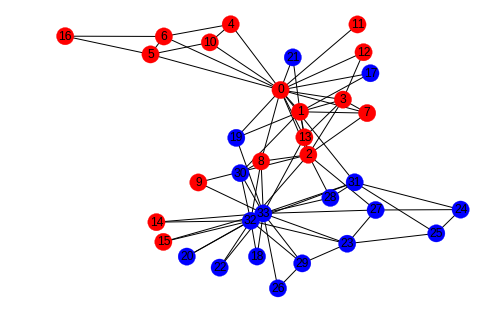

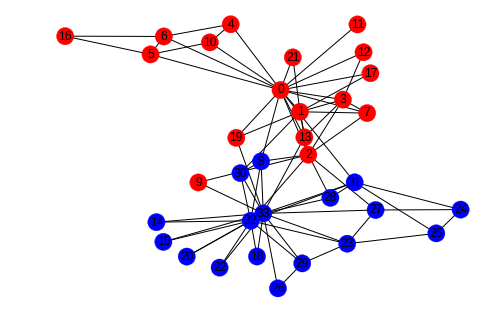

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import kernighan_lin_bisection

G = nx.karate_club_graph()
colors = ['red', 'blue', 'green', 'purple', 'brown', 'yellow']
pos = nx.spring_layout(G)

init_nodes = np.array_split(G.nodes(), 2)
init_partition = [set(init_nodes[0]), set(init_nodes[1])]
print(init_partition)

color_map_i = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in init_partition :
  for n in c :
    color_map_i[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_i)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_b :
  for n in c :
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_b)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

4.3.2 コミュニティ抽出

前節のネットワーク分割とは異なり、分割数や分割後のサイズがあらかじめ与えられずに、ネットワークの密な部分を抽出するアプローチをコミュニティ抽出と呼ぶ。コミュニティ抽出は、ネットワーク全体の構造を把握したり、可視化したりする上で有用であるだけでなく、似た嗜好のユーザに対する情報推薦を行ったり、口コミ情報の伝搬プロセスを考えたりする上でも重要である。
コミュニティの定義には様々なものがあり、それぞれに対して数多くのコミュニティ抽出手法が提案されている。その中で、本節では以下の手法について述べる。

* ラベル伝搬

ラベル伝搬は、全ての頂点が別々のコミュニティのラベルを持った状態を初期状態として、各頂点が周囲の頂点に合わせて自分の所属コミュニティを変更する処理を繰り返すことでコミュニティを決定する手法である。所属コミュニティの変更を同期的に行うか、非同期的に行うかなどのバリエーションがある。ラベル伝搬によるコミュニティ抽出は一般に高速であり、局所的な処理で済むことから並列化も比較的容易であるが、得られるコミュニティの質が高くないことが多い。

* モジュラリティ最適化

ネットワークを分割して得られるコミュニティの質を測る尺度として、モジュラリティがしばしば用いられる。ネットワークとコミュニティ集合が与えられたとき、モジュラリティ$Q$は以下の式で計算できる。

$Q = \frac{1}{2m}\sum_{ij}(A_{ij}-\frac{k_{i}k_{j}}{2m})\delta(c_{i},c_{j})$

ここで$m$はネットワークの辺の数、$A_{ij}$はネットワークの隣接行列$A$の$(i,j)$成分で、頂点$i$と頂点$j$の間に辺があれば1、そうでなければ0である。$k_{i}$は頂点$i$の次数、$c_{i}$は頂点$i$が属するコミュニティのラベル、$\delta(c_{i},c_{j})$の$\delta$はクロネッカーのデルタで、$c_{i}$と$c_{j}$が等しい(すなわち頂点$i$と頂点$j$が同じコミュニティに属する)ときに1、それ以外のときに0の値を取る。コミュニティ内の辺が密でコミュニティ間の辺が疎である場合(すなわち望ましいコミュニティ抽出ができている場合)にモジュラリティは正の大きな値を取り、逆にコミュニティ内の辺とコミュニティ間の辺の数が大差ない場合には0に近い値を取る。

このモジュラリティの値は、ネットワークをランダムに分割したときとの差異を表している。コミュニティ抽出の戦略として、このモジュラリティ値が大きくなるようなネットワークの分割を探索するやり方がしばしば用いられ、モジュラリティ最適化と呼ばれる。

* スペクトラルなモジュラリティ最適化

与えられたネットワークから、モジュラリティ値の大きいコミュニティ集合を見つけることは、頂点数の多いネットワークにおいては困難であり、ヒューリスティックなアルゴリズムがしばしば用いられる。例えばネットワーク分割におけるKernigham-Linアルゴリズムのように、初期分割での異なるグループの2頂点を入れ替えていくことでモジュラリティ値の大きい分割を得る方法も考えられるが、コミュニティのサイズはあらかじめわかっていないため、初期分割の大きさをどのように決めるかが問題になる。

上述のグラフ分割のようにスペクトラルなモジュラリティ最適化のアプローチもある。隣接行列をもとに、$B_{ij} = A_{ij} - \frac{k_{i}k_{j}}{2m}$となる行列$\bf B$を考える。これを用いるとモジュラリティ値$Q$は以下のように表される。

$Q = \frac{1}{2m}\sum_{ij}(A_{ij}-\frac{k_{i}k_{j}}{2m})\delta(c_{i},c_{j}) =  \frac{1}{2m}\sum_{ij}B_{ij}\delta(c_{i},c_{j})$

ネットワークを2分割することを考える。頂点$i$の属するグループによって$s_{i}$を以下のように定義する。

$s_{i} = \left\{ \begin{array}{ll}
                        +1 & \mbox{vertex $i$ belongs to group 1}\\
                        -1  & \mbox{vertex $i$ belongs to group 2}
                     \end{array}
         \right. $
         
すると$\delta(c_{i},c_{j}) = \frac{1}{2}(s_{i}s_{j}+1)$で表せることから、

$Q = \frac{1}{4m}\sum_{ij}B_{ij}(s_{i}s_{j}+1) =  \frac{1}{4m}\sum_{ij}B_{ij}s_{i}s_{j}$
行列で表現すると以下のようになる。
$Q = \frac{1}{4m}{\bf s^{T}Bs}$

ネットワークが与えられればモジュラリティ行列${\bf B}$は定まることから、モジュラリティ値$Q$を最大化するようなベクトル$s$を求める。$s$の要素は+1か-1であるが、この条件を緩めて任意の値を取れるようにし、ただしベクトルの長さは同じになるようにする。すなわち${\bf s^{T}s}=\sum_{i}s_{i}^{2}=n$という制約を与える。

これを先ほどと同様にラグランジュの未定乗数法を用いて解くと、${\bf Bs}=\beta {\bf s}$が得られ、ベクトル${\bf s}$はモジュラリティ行列の固有ベクトルの一つであることがわかる。これを代入すると$Q = \frac{1}{4m}\beta{\bf s^{T}s}= \frac{n}{4m}\beta$となる。モジュラリティ値$Q$を最大化するために、${\bf s}$としてモジュラリティ行列${\bf B}$の最大固有値に対応する固有ベクトル${\bf s = u_{1}}$とし、${\bf u_{1}}$の$i$番目の要素${\bf [u_{1}}]_{i}$の正負に応じて$s_{i}$に+1または-1の値を割り当てる。

$s_{i} = \left\{ \begin{array}{ll}
                        +1 & \mbox{if ${\bf [u_{1}}]_{i} > 0$}\\
                        -1  & \mbox{if ${\bf [u_{1}}]_{i} < 0$}
                     \end{array}
         \right. $

以上をまとめると、スペクトラルなモジュラリティ値の最大化の手法は以下のようになる。

1. 与えられたネットワークのモジュラリティ行列の最大固有値に対応する固有ベクトルを求める。
2. その固有ベクトルの各要素の正負に応じて、正の要素のコミュニティと負の要素のコミュニティとに分ける。

このようなネットワークの2分割を繰り返すことによってより多くの分割を行うことができる。
ただし、一般に2分割を繰り返すことで最適なn分割を得られるとは限らない。

ヒューリスティックなモジュラリティの最大化の手法としては、BlondelらのLouvain法がしばしば用いられる。これはネットワークからまず局所的な小さいコミュニティを貪欲法で抽出し、次に得られた各コミュニティ内の頂点をまとめて一つの頂点とみなしたメタネットワークにおけるコミュニティ抽出を行う処理を繰り返すことで、最終的には階層的なコミュニティ抽出を行うものである。

本節では取り上げなかったが、重なりのあるコミュニティの抽出や、辺に重みや向きがある場合のコミュニティの抽出など、コミュニティ抽出には数多くのバリエーションがあり、それぞれに対してさまざまな手法が提案されている。またモジュラリティやカットの他にコミュニティの質を測る尺度として、conductanceなどがある。

以下のプログラムでは、Zachary's karate clubネットワークを対象とし、モジュラリティ最適化によるコミュニティ抽出と、ラベル伝搬によるコミュニティ抽出の結果を頂点の色で示している。

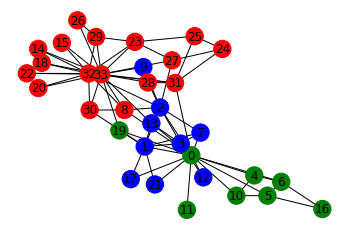

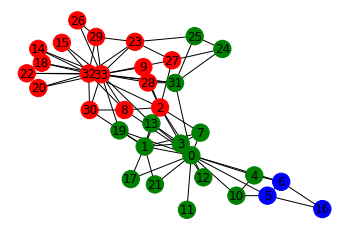

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import label_propagation_communities

G = nx.karate_club_graph()
colors = ['red', 'blue', 'green', 'purple', 'brown', 'yellow']
pos = nx.spring_layout(G)

lst_m = greedy_modularity_communities(G)
color_map_m = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_m :
  for n in c :
    color_map_m[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_m)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

lst_l = label_propagation_communities(G)
color_map_l = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_l :
  for n in c :
    color_map_l[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_l)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()